In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 18240
team_id = 169 # 180/169
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g)

df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=team_id)
df_actions = (
spadl
.add_names(df_actions)
.merge(api.teams(game_id=g))
.merge(api.players(game_id=g))
)
df_actions = df_actions.sort_values(by=['period_id', 'time_seconds'], ascending=[True, True]).reset_index(drop=True)

    nice_time    player_name                   type_name    result_name    team_name
--  -----------  ----------------------------  -----------  -------------  -------------
 0  0m13s        David Olatukunbo Alaba        pass         success        Bayern Munich
 1  0m14s        Dante Bonfim da Costa Santos  dribble      success        Bayern Munich
 2  0m17s        Dante Bonfim da Costa Santos  pass         success        Bayern Munich
 3  0m19s        Manuel Neuer                  dribble      success        Bayern Munich
 4  0m21s        Manuel Neuer                  pass         success        Bayern Munich
 5  0m23s        Dante Bonfim da Costa Santos  dribble      success        Bayern Munich
 6  0m26s        Dante Bonfim da Costa Santos  pass         success        Bayern Munich
 7  0m27s        Bastian Schweinsteiger        dribble      success        Bayern Munich
 8  0m31s        Bastian Schweinsteiger        pass         success        Bayern Munich
 9  0m34s        Jérôme B

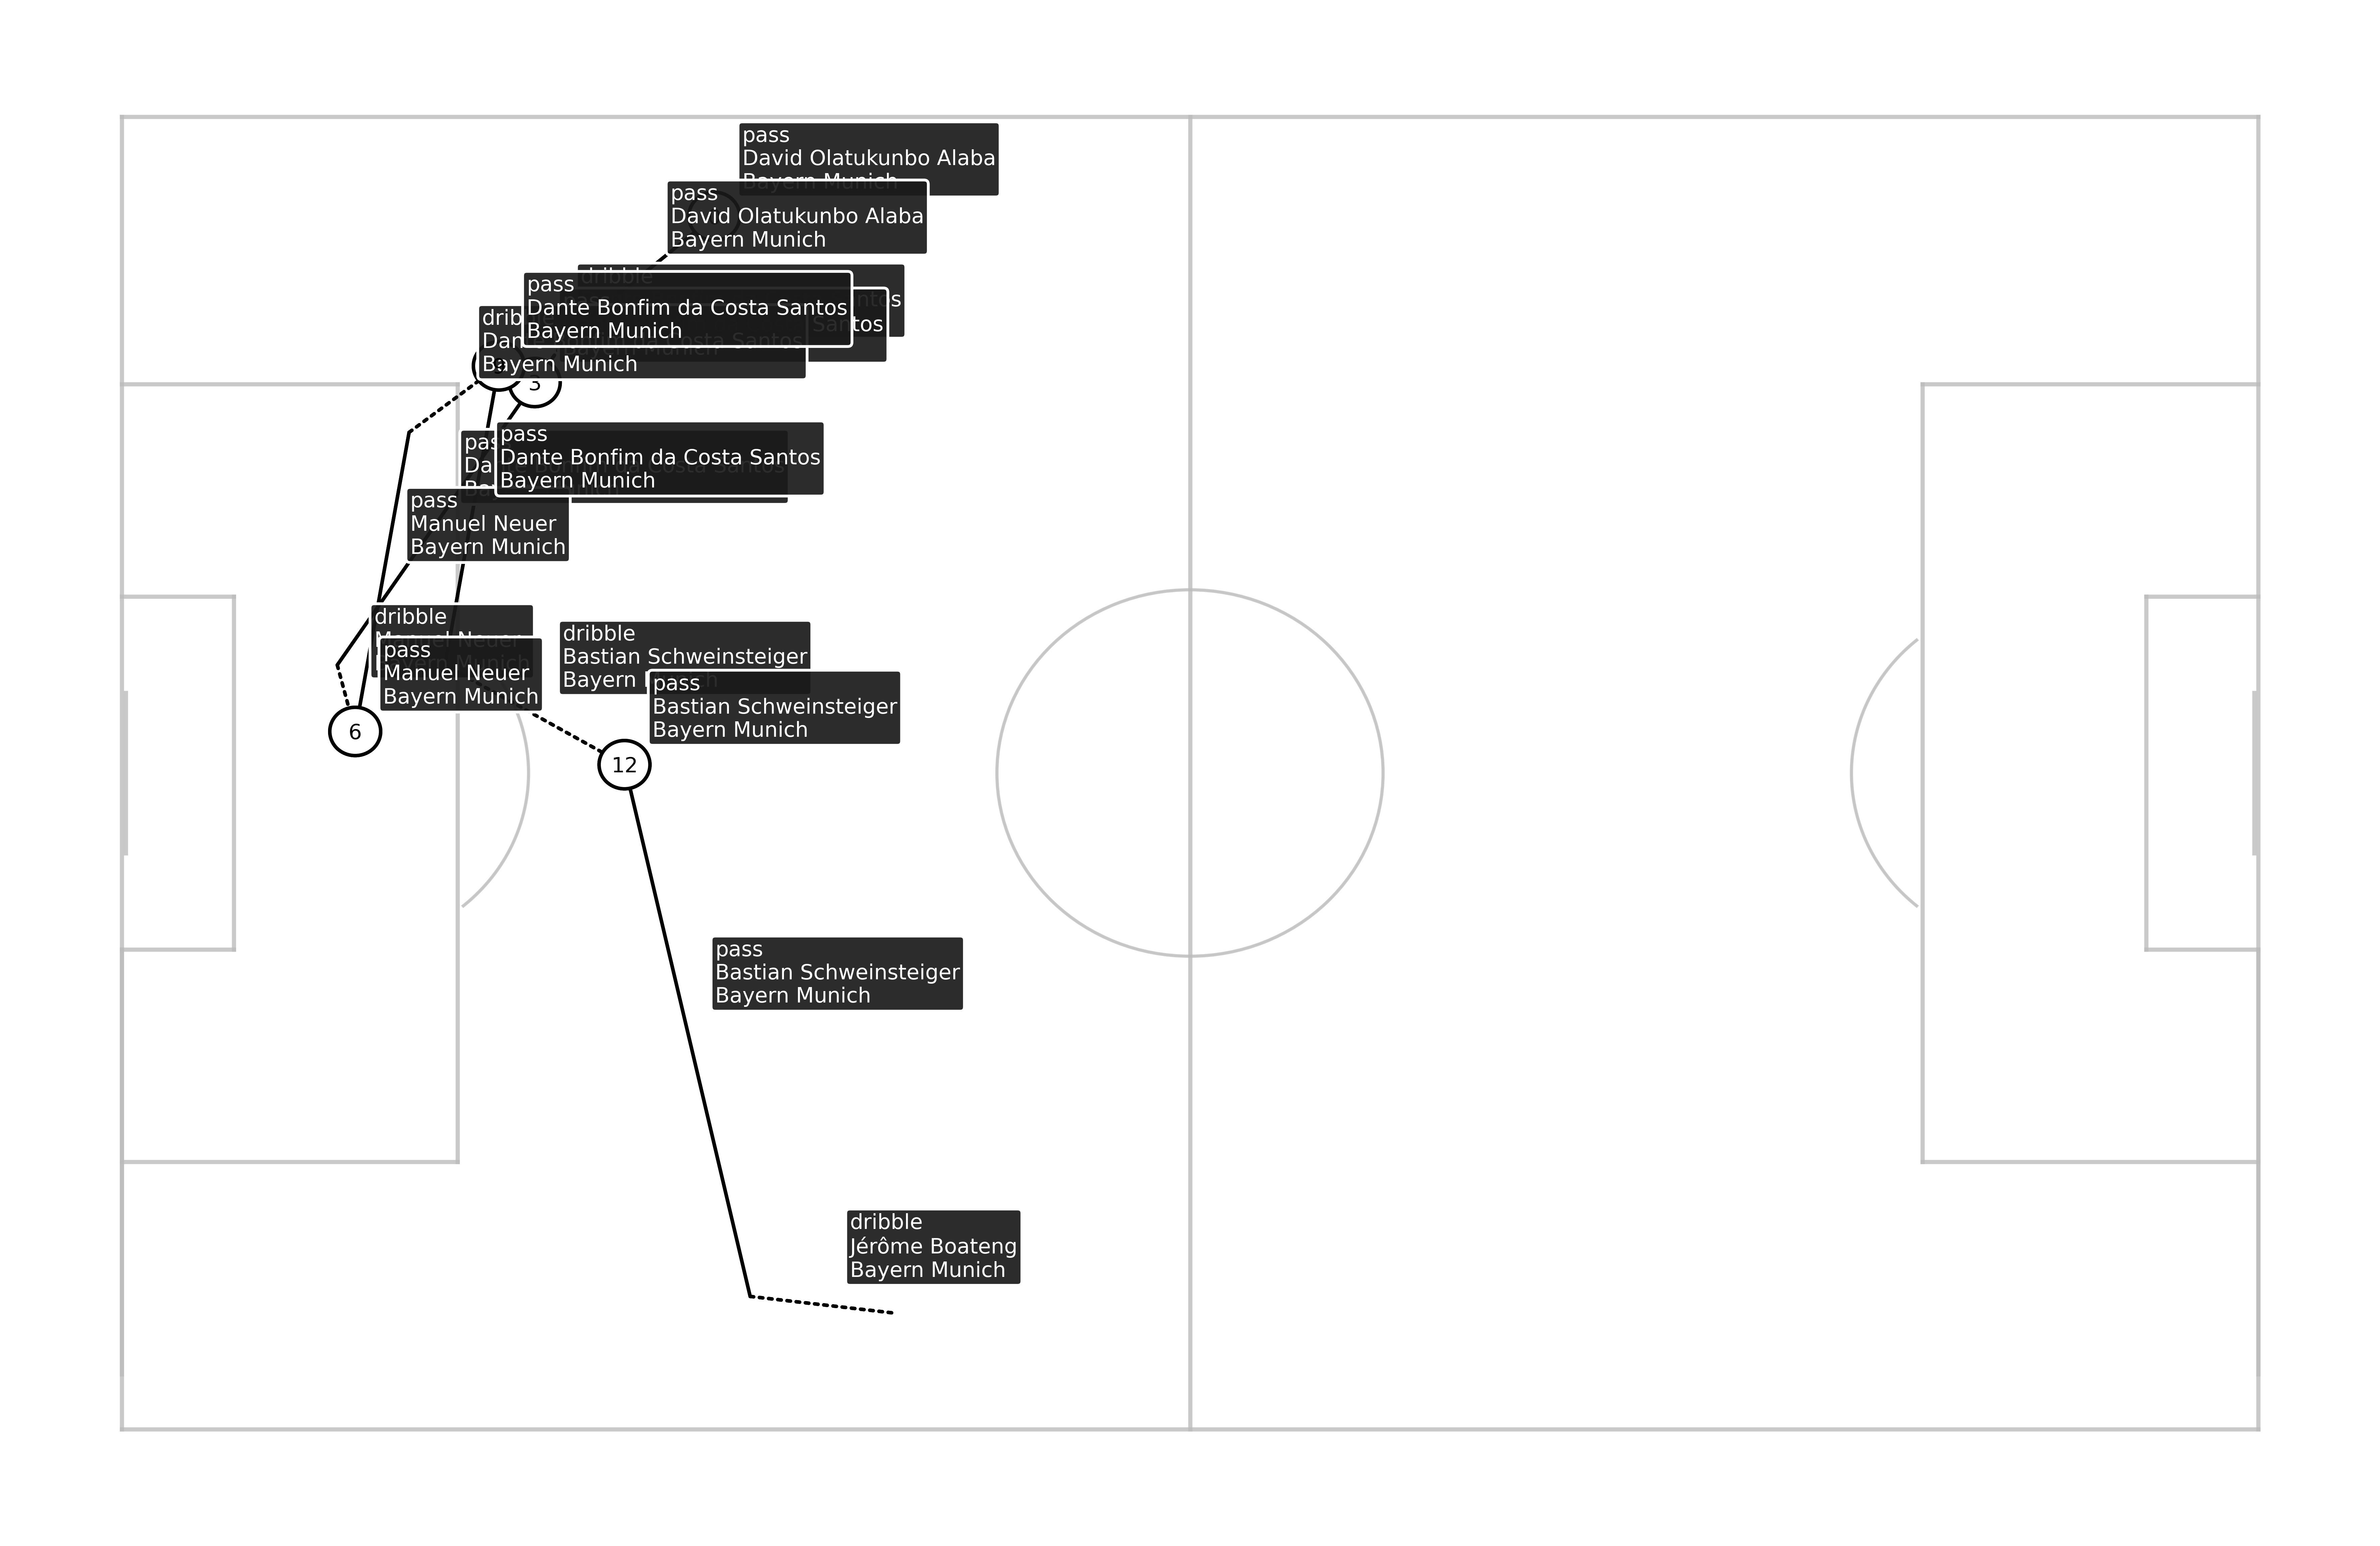

In [3]:
import statsbombplot as pys

df = df_actions[10 : 20].copy()
df = df.reset_index(drop=True)

pys.draw_svg_actions(df)